# Die Schweizermesser für Datenaufbereitung und Visualisierung

Von den hunderten Paketen unterschiedlicher Spezialisierung sind diese drei für mich unverzichtbar:

In [ ]:
library(ggplot2) ## Visualisierung
library(dplyr) ## Datenaufbereitung
library(tidyr) ## "
## library(rio) ## Datenaustausch zwischen R und dem Rest der Welt

heute brauchen wir außerdem (statt {rio})

In [3]:
library(readr)

Warning message:
"Paket 'ggplot2' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.1.3 erstellt"

Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Paket 'tidyr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'purrr' wurde unter R Version 4.1.3 erstellt"

Attache Paket: 'purrr'


Das folgende Objekt ist maskiert 'package:jsonlite':

    flatten


Warning message:
"Paket 'readr' wurde unter R Version 4.1.3 erstellt"


# Daten von außen nach R
Für die heutige Übung werfen wir einen Blick auf die Nährstoffgehalte von Bäumen. Die Messdaten stammen vom Integrated Monitoring - Standort Zöbelboden.

Hier wird `read_csv` verwendet, um CSV von einer URL abzurufen. Für die Praxis empfehle ich den Universal-Importer/Exporter [**{rio}**](https://github.com/gesistsa/rio), der auf dieser Plattform noch nicht verfügbar ist.

In [4]:
d <- read_csv('https://raw.githubusercontent.com/1O/R-intro-2023/master/assets/elementgehalt.csv')

Rows: 483 Columns: 13
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): art, standort
dbl (11): jahr, jahrgang, n, s, ca, na, k, mg, p, mn, TC

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Überblick verschaffen

Um ein Gefühl für die Daten zu bekommen, gibt es in R verschiedene Befehle.

Zum Beispiel: `str` (Struktur), `head` bzw `tail` (Beginn/Ende) oder `glimpse` (**{tibble}**)


In [5]:
str(d)

spc_tbl_ [483 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ art     : chr [1:483] "Buche" "Buche" "Buche" "Buche" ...
 $ standort: chr [1:483] "site_300" "site_300" "site_300" "site_300" ...
 $ jahr    : num [1:483] 1993 1993 1994 1994 1995 ...
 $ jahrgang: num [1:483] 1 1 1 1 1 1 1 1 1 1 ...
 $ n       : num [1:483] 25.4 25.2 24.5 23.6 NA ...
 $ s       : num [1:483] 1.32 1.53 1.49 1.71 1.63 ...
 $ ca      : num [1:483] 11.7 11.8 14.7 12.9 13.3 ...
 $ na      : num [1:483] 0.0414 0.0442 0.0299 0.0339 0.0393 ...
 $ k       : num [1:483] 5.62 7.42 5.72 7.72 3.31 ...
 $ mg      : num [1:483] 2.82 2.02 3.08 2.28 4.57 ...
 $ p       : num [1:483] 0.829 0.964 1.179 NA 0.951 ...
 $ mn      : num [1:483] NA NA NA NA NA ...
 $ TC      : num [1:483] 542 525 512 514 515 ...
 - attr(*, "spec")=
  .. cols(
  ..   art = col_character(),
  ..   standort = col_character(),
  ..   jahr = col_double(),
  ..   jahrgang = col_double(),
  ..   n = col_double(),
  ..   s = col_double(),
  ..   ca = col_

In [8]:
head(d, 2) ## zeigt erste zwei Zeilen

art,standort,jahr,jahrgang,n,s,ca,na,k,mg,p,mn,TC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Buche,site_300,1993,1,25.35832,1.323043,11.69129,0.04137817,5.621830,2.819184,0.8294377,NA,542.4476
Buche,site_300,1993,1,25.21377,1.534751,11.77154,0.04416795,7.416137,2.022583,0.9636045,NA,525.1041


In [10]:
tibble::glimpse(d)

Rows: 483
Columns: 13
$ art      <chr> "Buche", "Buche", "Buche", "Buche", "Buche", "Buche", "Buche"~
$ standort <chr> "site_300", "site_300", "site_300", "site_300", "site_300", "~
$ jahr     <dbl> 1993, 1993, 1994, 1994, 1995, 1995, 1996, 1996, 1997, 1997, 1~
$ jahrgang <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ n        <dbl> 25.35832, 25.21377, 24.54642, 23.55460, NA, 23.07692, 21.8102~
$ s        <dbl> 1.323043, 1.534751, 1.494130, 1.713062, 1.633987, 1.758242, 1~
$ ca       <dbl> 11.691290, 11.771541, 14.668090, 12.941113, 13.275599, 12.558~
$ na       <dbl> 0.04137817, 0.04416795, 0.02988260, 0.03394004, 0.03929194, 0~
$ k        <dbl> 5.621830, 7.416137, 5.720384, 7.716274, 3.309368, 5.446154, 4~
$ mg       <dbl> 2.819184, 2.022583, 3.076841, 2.280514, 4.568627, 2.559341, 2~
$ p        <dbl> 0.8294377, 0.9636045, 1.1787620, NA, 0.9514161, 0.9734066, 0.~
$ mn       <dbl> NA, NA, NA, NA, NA, NA, NA, 0.1124295, NA, 0.1254634, NA, NA,~
$ TC       <dbl> 5

`pairs` erstellt einen scatterplot-Matrix. Nichtnumerische Variablen erzeugen einen Fehler. Deswegen wählen wir, vorerst "händisch",
numerische Variablen, und zwar alle von `n` (Stickstoff) bis `mn` (Mangan).

... und zwar gleich mit den Befehlen aus dem **tidyverse** und einer Auswerte-Pipeline, für die wir den **pipe operator** `%>%` verwenden. Der lässt sich (außer in dieser Übungsumgebung dzt.) mit <kbd>CTRL</kbd>+<kbd>SHIFT</kbd>+<kbd>M</kbd> einfügen.

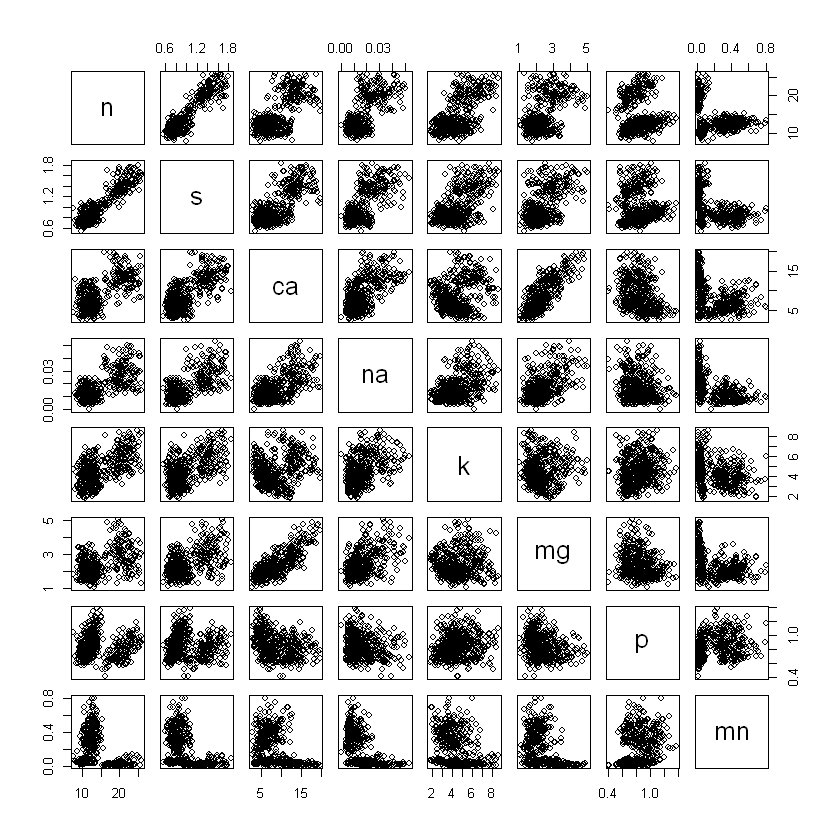

In [13]:
d %>%
    select(n:mn) %>%
    pairs

💡 **best practice**

Pro Auswertung nur eine Datenquelle als *single source of truth* einlesen und erst das Endergebnis wieder speichern (als R-Datei oder Export). Nach Möglichkeit keine Zwischenergebnisse als R-Objekte im Arbeitsspeicher anlegen und darauf zurückgreifen. Damit ist sichergestellt, dass veraltete globale Objekte (`tmp`, `daten_bereinigt` etc.) nicht an anderer Stelle im Code versehentlich weiterverwendet werden.

Man kann zwar mit `save.image()` den gesamten R-"Desktop" speichern und bei nächster Gelegenheit wieder laden, aus o.g. Gründen rate ich davon aber ab.

Beispiele:
```
d <- import('./data/meine_Messdaten.xlsx')

d %>%
    Befehl_1 %>% 
    Befehl_2 %>%
    Befehl_3 %>%
    ggplot() ## erstellt Diagramm

ggsave('./images/Trenddiagramm.png')
```
oder:
```
d %>%
    ## ... Auswertung
    Befehl_3 %>%
    export('./data/Ergebnisse.xlsx)
```    

# Datensäuberung und -beschreibung
Darunter fällt wschl. der größte Teil unserer Arbeiten, bevor es noch zu irgendeiner tiefergehenden Analyse kommt. Oft ist es damit auch schon wieder getan.


In [14]:
head(d, 1)

art,standort,jahr,jahrgang,n,s,ca,na,k,mg,p,mn,TC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Buche,site_300,1993,1,25.35832,1.323043,11.69129,0.04137817,5.62183,2.819184,0.8294377,NA,542.4476


💡 **best practice**

Anders als in Excel üblich, lassen sich sich Daten meist effizienter analysieren, wenn sie vom Quer- ins Hochformat gebracht werden [[**Wieso?**](https://tidyr.tidyverse.org/articles/tidy-data.html)].

In unserem Beispiel heißt das: die Ausgangstabelle so pivotieren, dass aus den neun Spalten mit Elementgehalten zwei Spalten entstehen: eine mit der Elementbezeichnung, eine mit dem Messwert.

In [23]:
d_long <- 
    d %>% ## zu Übungszwecken wird hier doch ein Zwischenergebnis gespeichert
    pivot_longer(cols = n:TC, 
                 names_to = 'element',
                 values_to = 'messwert'
                 )

In [24]:
d_long %>% sample_n(5) ## 5 zufällig gewählte Zeilen (Beobachtungen) aus d_long

art,standort,jahr,jahrgang,element,messwert
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Fichte,site_300,2003,2,TC,485.172378
Buche,site_300,2008,1,mg,1.543674
Fichte,site_300,1996,2,s,NA
Fichte,site_700,2016,1,n,9.013730
Buche,site_300,1998,1,k,7.706587


Durch das Hochformat lassen sich einfach beschreibende Statistiken für Untergruppen erstellen:

In [29]:
d_long %>%
    summarise(hoechstwert = max(messwert, na.rm = TRUE), ## NAs sollen nicht zu einem NA im Maximum führen
              .by = c(art, jahrgang, element)
             ) %>%
    arrange(art, jahrgang, element)  %>% ## nach diesen Variablen sortieren
    sample_n(5)

art,jahrgang,element,hoechstwert
<chr>,<dbl>,<chr>,<dbl>
Fichte,2,TC,550.9989485
Buche,1,k,8.5959052
Fichte,2,s,1.1037528
Fichte,1,p,1.3763096
Fichte,1,mn,0.6302345


Für mehrere Statistiken (wo `summarise` mehr als einen Wert = Zeile zurückgibt): `reframe`

In [55]:
d_long %>%
    reframe(min = min(messwert, na.rm = TRUE),
            median = median(messwert, na.rm = TRUE),
            max = max(messwert, na.rm = TRUE),
            .by = c(art, jahrgang, element)
            ) %>%
    sample_n(5)

art,jahrgang,element,min,median,max
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Fichte,2,ca,4.0110132,7.7630843,12.788960
Fichte,2,s,0.5999368,0.8170114,1.103753
Buche,1,p,0.4112280,0.7807274,1.178762
Fichte,2,n,7.6586433,11.7320840,14.588581
Fichte,1,k,2.0371732,4.3360387,7.224587


# Analysieren am Fließband: der Vorteil von *tidy data* und der Pipeline

Unterscheiden sich (frische) Fichtennadeln und Buchenblätter in ihren Elementgehalten?
Es wäre schön, den Test für alle Elemente durchzuführen, ohne jedesmal ein Element angeben zu müssen.


Hier soll, für die schnelle Orientierung, ein nichtparametrischer Test verwendet werden (Wilcoxon-Rangsummen ~ Mann-Whitney-U; vgl: `?wilcox.test`):

In [175]:
d_long %>%
    filter(jahrgang == 1)  %>% ## Achtung auf das doppelte Gleichheitszeichen!
    select(-c(standort, jahr)) %>% ## Annahme: keine Interaktion mit Standort und Jahr
    reframe(p_wilcox = wilcox.test(messwert ~ art)$p.value,
            .by = element ## führt die Aggregation (hier: Test) pro Element durch
             )  %>% 
    mutate(p_wilcox = p_wilcox %>% round(3)  %>%  format(scientific = F))

element,p_wilcox
<chr>,<chr>
n,0.000
s,0.000
ca,0.000
na,0.000
k,0.000
mg,0.000
p,0.000
mn,0.000
TC,0.004


**Tipp:**

**`export('clipboard')`** {rio} kopiert einen *dataframe* in die Zwischenablage, fürs Einfügen in Excel oder anderen Präsentationssoftware

Kontrollplot:

Warning message:
"Removed 123 rows containing non-finite values (`stat_boxplot()`)."


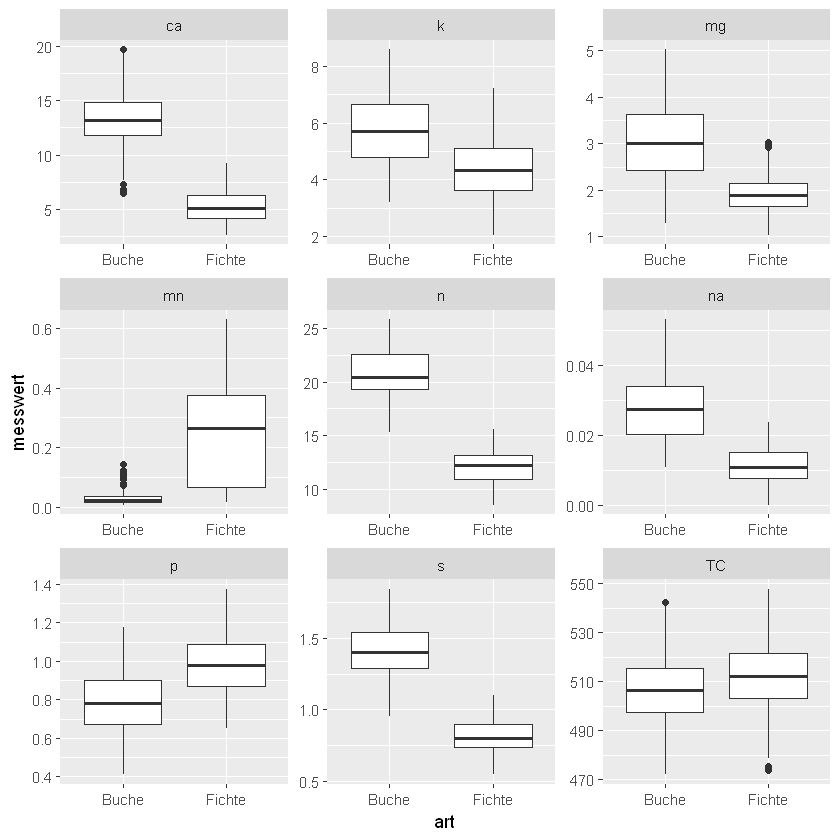

In [176]:
d_long %>%
    filter(jahrgang == 1) %>%    
    ggplot() +
        geom_boxplot(aes(x = art, y = messwert)) +
        facet_wrap(~ element, scales = 'free') ## eine Kachel pro Element

# Visualisierung

Von den vielen Grafikpaketen ist **{ggplot}** unbestritten die Nummer Eins.

ggplot braucht etwas Umdenken, wurde aber in kurzer Zeit so populär, dass ein ganzes Visualisierungs-Biotop rund um {ggplot} entstanden ist, und andere Sprachen Konzept und z. T. auch Design übernommen haben.

Das **gg** steht für *grammar of graphics*: ein Diagramm wird, wie ein Satz, als Kombination von Grundelementen verstanden:

- Daten
- visuelle Reize (*aesthetics*): Position, Größe, Farbe, Form ... zur Kodierung der Daten
- Geometrie: Punkt, Linie, Fläche, Band, Boxplot ...

Aus diesen Komponenten setzt sich ein *layer* zusammen, und verschiedene layer können überlagert werden (z. B. Punkte und Boxplot, Polygone und Hintergrundkarten, Trendlinien und Scatterplots)

- Beispiel: Trend der Elementgehalte in Buchenblättern

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 68 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 68 rows containing missing values (`geom_point()`)."


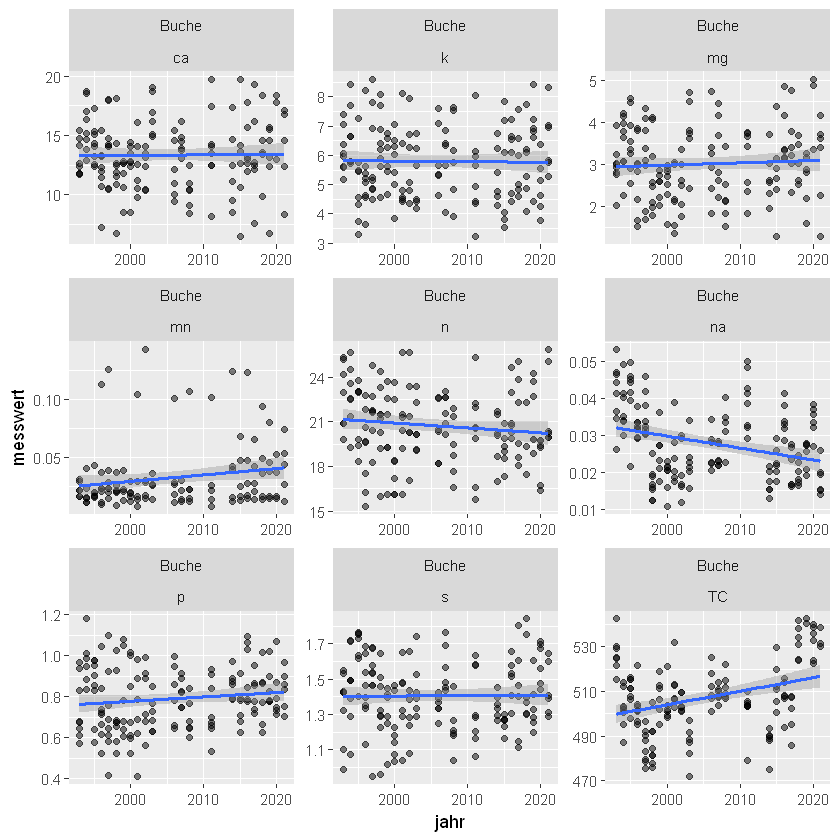

In [187]:
d_long %>%
    filter(art == 'Buche') %>% 
    ggplot(aes(x = jahr, y = messwert)) + ## "Grundgerüst für Plot anlegen"
        geom_point(alpha = .5) + ## Punktgeometrie hinzufügen: "scatterplot", alpha = .5 (halbtransparent)
        geom_smooth(method = 'lm') +
        facet_wrap(art ~ element, scales = 'free')

`ggsave('Abbildung_1.png')` speichert den aktuellsten Plot im aus der Dateiendung ableitbaren Format. Breite, Höhe und Auflösung können zusätzlich angegeben werden.

💡 **best practice**

Grafiken speichere ich routinemäßig (auch) im SVG-Format, das eine verlustfreie Darstellung im Web und die bequeme Nachbearbeitung mit anderer Software wie dem freien [**Inkscape**](https://inkscape.org/de/) erlaubt.
